<a href="https://colab.research.google.com/github/g-tumwesigye/water_quality_model_assignment/blob/main/Water_Qaulity_Analysis_PLD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model.
This notebook contain 3 ML model from each memeber of PLD_4, using Keras and Tensorflow and other necessary libraries.

Team member:
```Jules Gatete```, ```Geofrey Tumwesigye```, ```Pascal Mugisha```

## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv

In [1]:
# Libraries used to train model and data pre-processing.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# libraries for Model architecture and training process for members
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.regularizers import l2

In [ ]:
#LOAD THE DATA

# **Data Loading**

In [2]:
# Importing dataset from Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/water_potability.csv'
data = pd.read_csv(path)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## **Data Pre-Processing**

In [4]:
# Missing data
print(data.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## **Data Pre-Processing**

In [6]:
data.fillna(data.mean(), inplace=True)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
# Generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [8]:
#Splitting the dataset into target and features
target = "Potability"
X = data.drop(target, axis=1)
y = data[target]

In [9]:
# Standardsiding data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

## **Data Splitting**

In [10]:
# First: split into 60% training and 40% (temporary set for validation & test in equal share)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Second: Split the 40% temporary set into 20% validation and 20% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training data: {X_train.shape[0]}")
print(f"Validation data: {X_val.shape[0]}")
print(f"Testing data: {X_test.shape[0]}")

Training data: 1965
Validation data: 655
Testing data: 656


## **Model Architecture for Each Member**

### Model_1: ```Pascal Mugisha```

Epoch 315: early stopping
Train: 0.661, Test: 0.662


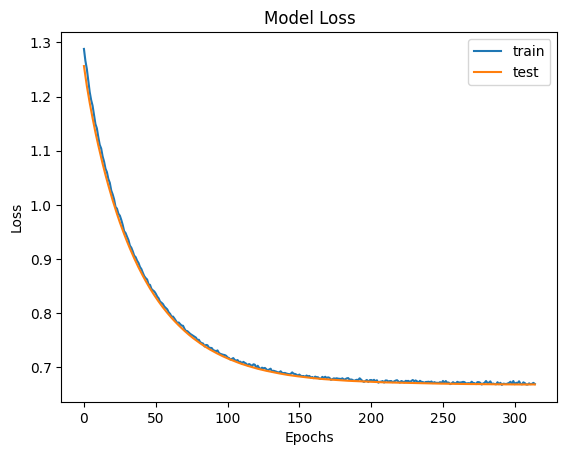

In [11]:
#Model Definition by member 1
def myModel_Pascal():
    """
    Builds, compiles, and trains a sequential neural network model with L2 regularization and early stopping.
    """

    # Model definition
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Defining the input shape
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

    # Compile the model with Stochastic Gradient Descent
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

    return model


model = myModel_Pascal()

# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es])

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,755 (10.77 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Model Evalution metrics**

In [13]:
# Making predictions for metric
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate each metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.662
Precision: 0.778
Recall: 0.191
F1 Score: 0.306


### Model_2: ```Geofrey Tumwesigye```

 Training Samples: 2293, Validation: 491, Test: 492


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4537 - loss: 1.4439 - val_accuracy: 0.3971 - val_loss: 1.0094 - learning_rate: 0.0020
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4282 - loss: 1.1840 - val_accuracy: 0.4196 - val_loss: 0.8587 - learning_rate: 0.0020
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4669 - loss: 1.0564 - val_accuracy: 0.5580 - val_loss: 0.7645 - learning_rate: 0.0020
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5469 - loss: 0.9875 - val_accuracy: 0.5112 - val_loss: 0.7600 - learning_rate: 0.0020
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5819 - loss: 0.9502 - val_accuracy: 0.4868 - val_loss: 0.7814 - learning_rate: 0.0020
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5814 - loss: 0.9409 - val_accuracy: 0.5519 - val_loss: 0.7348 - learning_rate: 0.0020
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5889 - loss: 0.9315 - val_ac

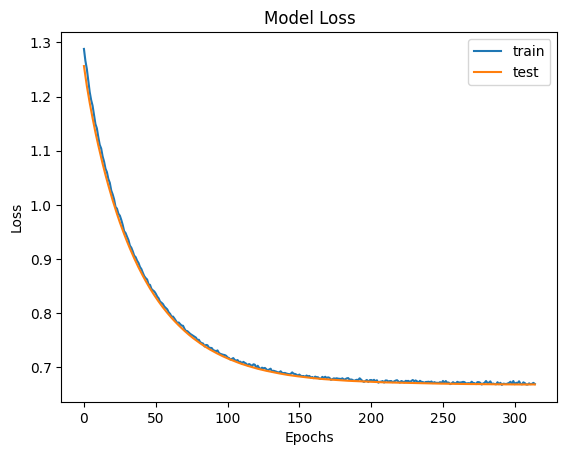

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test Accuracy: 0.6687
F1 Score: 0.5831
Recall: 0.5938
Precision: 0.5729


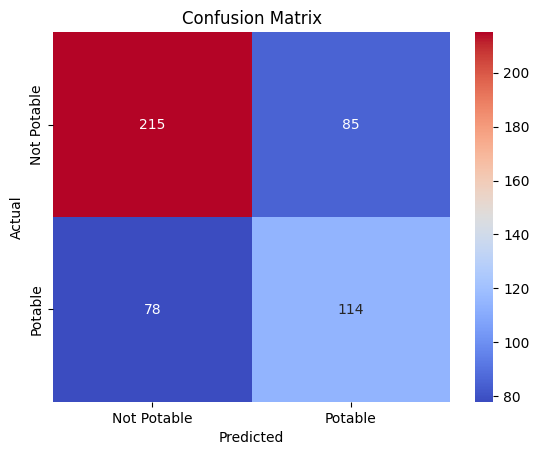

In [14]:
# Model Definition by member 2
!pip install seaborn
import seaborn as sns

# DATA SPLITTING
from sklearn.model_selection import train_test_split

# Split dataset: 70% training, validation (15%) and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print sample sizes
print(f" Training Samples: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")

# MODEL ARCHITECTURE (BUILDING A NEURAL NETWORK WITH L2 REGULARIZATION & DROPOUT
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

# Defining the model with L2 Regularization & Dropout
def build_the_model():
    the_model = keras.Sequential([
        layers.Dense(64, activation='relu', kernel_regularizer=l2(0.007), input_shape=(X_train.shape[1],)),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu', kernel_regularizer=l2(0.007)),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu', kernel_regularizer=l2(0.007)),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    return the_model

# Creating the model instance
the_model = build_the_model()

# Displaying the model architecture
the_model.summary()

# APPLYING LEARNING RATE SCHEDULING, EARLY STOPPING & CLASS WEIGHTING
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=7, min_lr=1e-5)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Class weights
class_weight_dict = {0: 1, 1: 2}

# TRAINING THE MODEL
# Compiling the model
optimizer = keras.optimizers.RMSprop(learning_rate=0.002)
the_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history_the_model = the_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, lr_scheduler]
)

# EVALUATING THE MODEL
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Importing confusion_matrix

# Evaluating the model on test set
test_loss, test_acc = the_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generating predictions
y_pred = (the_model.predict(X_test) > 0.5).astype("int32")

# Computing classification metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Not Potable", "Potable"], output_dict=True)

# Extracting the key metrics
f1_score = report["Potable"]["f1-score"]
recall = report["Potable"]["recall"]
precision = report["Potable"]["precision"]

# Printing results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



### Model_3: ```Jules Gatete```

In [19]:
#Model Definition by member 3
import numpy as np

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.0002),
                          kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0002),
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.0002),
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.1),  # Reduced dropout for better learning retention
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
# Adam optimizer with learning rate 0.0002
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Set EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Properly map class weights
class_weight_dict = {0: class_weights[0], 1: class_weights[1] * 1.1}

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=120,
    batch_size=128,
    class_weight=class_weight_dict,
    callbacks=[early_stopping],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4618 - loss: 0.9304 - val_accuracy: 0.4277 - val_loss: 0.9336
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4865 - loss: 0.8707 - val_accuracy: 0.4582 - val_loss: 0.8855
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4890 - loss: 0.8485 - val_accuracy: 0.4766 - val_loss: 0.8564
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5286 - loss: 0.8334 - val_accuracy: 0.4827 - val_loss: 0.8334
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5567 - loss: 0.8204 - val_accuracy: 0.5031 - val_loss: 0.8178
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5694 - loss: 0.7952 - val_accuracy: 0.5010 - val_loss: 0.8050
Epoch 7/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5582 - loss: 0.7967 - val_accuracy: 0.5356 - val_loss: 0.7950
Epoch 8/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5841 - loss: 0.7785 - val_accuracy: 0.5438

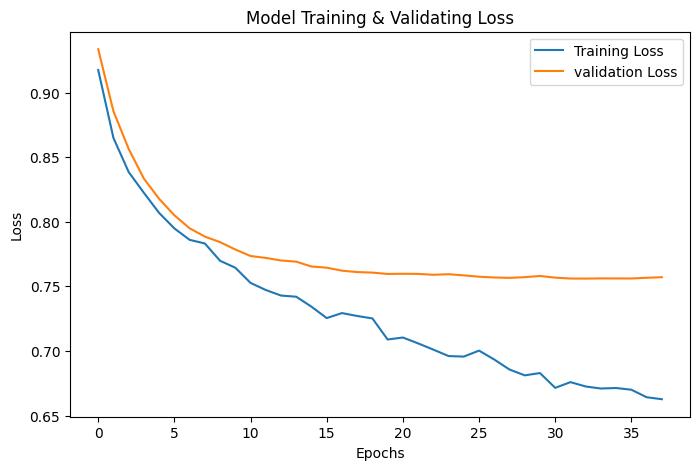

In [20]:
# Training History: Loss over Epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Training & Validating Loss")
plt.legend()
plt.show()


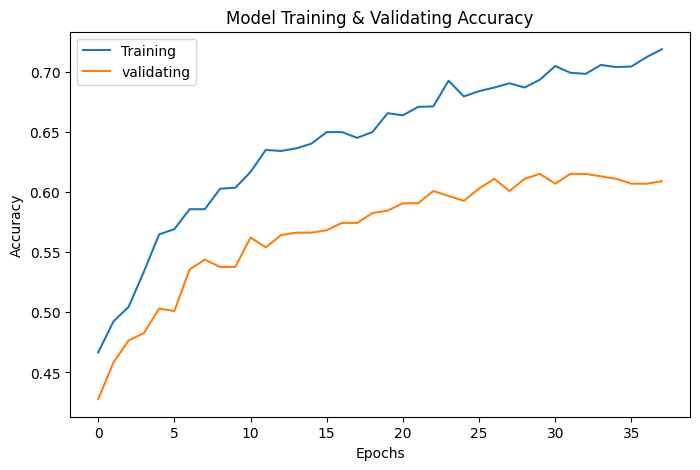

In [21]:
# Training History: Accuracy over Epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Training ")
plt.plot(history.history["val_accuracy"], label="validating")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Training & Validating Accuracy")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import classification_report

# 📌 Evaluate the Model on Training and Testing Data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# 📌 Print Evaluation Results
print("\n📊 **Model Performance Evaluation**")
print("-" * 40)
print(f"Training Loss: {train_loss:.3f}")
print(f"Testing Loss : {test_loss:.3f}")
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy : {test_acc:.3f}")

# 📌 Compute Additional Classification Metrics
Y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import f1_score, recall_score, precision_score
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Print F1 Score, Recall, and Precision
print("\nReport:")

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"F1 Score: {f1}, Recall: {recall}, Precision: {precision}")

print("\n")
print("\n")
model.summary()


📊 **Model Performance Evaluation**
----------------------------------------
Training Loss: 0.633
Testing Loss : 0.761
Training Accuracy: 0.729
Testing Accuracy : 0.589
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       300
           1       0.57      0.59      0.58       192

    accuracy                           0.67       492
   macro avg       0.65      0.66      0.65       492
weighted avg       0.67      0.67      0.67       492


Report:
F1 Score: 0.5831202046035806, Recall: 0.59375, Precision: 0.5728643216080402






Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,485 (142.52 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 24,068 (94.02 KB)

# --------The End--------